<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"><h1>Visualization for Science</h1>
<h1>Global Airports</h1>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from tqdm import tqdm
tqdm.pandas()
import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: af0ecbb862fc3f9552266c8ed65df6c09429d481

numpy     : 1.19.2
watermark : 2.1.0
matplotlib: 3.3.2
cartopy   : 0.18.0
pandas    : 1.1.3
json      : 2.0.9



Set the default list of colors

In [3]:
colors = ['#51a7f9',
 '#cf51f9',
 '#70bf41',
 '#f39019',
 '#f9e351',
 '#f9517b',
 '#6d904f',
 '#8b8b8b',
 '#810f7c']

# Airport Data

As before, we load the airport information from the 'Master Coordinate' dataset downloaded from [BTS](https://www.transtats.bts.gov/Tables.asp?DB_ID=595&DB_Name=Aviation%20Support%20Tables&DB_Short_Name=Aviation%20Support%20Tables). Here we are only interested in 4 fields

In [4]:
airports = pd.read_csv('https://github.com/DataForScience/Graphs4Sci/raw/master/data/336781026_T_MASTER_CORD.zip', 
                       usecols=['AIRPORT', 'LATITUDE', 'LONGITUDE', 'AIRPORT_IS_LATEST'])

The _AIRPORT_IS_LATEST_ field represents the most recent coordinates for a given airport (coordinates can change when airports move to a new location in order to expand). We make sure to pick always the most recent coordinates

In [5]:
airports.set_index('AIRPORT').loc['JFK']

,LATITUDE,LONGITUDE,AIRPORT_IS_LATEST
AIRPORT,,,
JFK,40.638611,-73.776944,0
JFK,40.639722,-73.778889,0
JFK,40.640000,-73.778611,0
JFK,40.639722,-73.778889,0
JFK,40.640000,-73.778611,1


We filter out just the most recent set of coordinates

In [6]:
airports = airports[airports.AIRPORT_IS_LATEST==1].drop(columns=['AIRPORT_IS_LATEST'])

So we have over 6,500 airports as the BTS database includes airports all over the world. 

In [7]:
airports.shape

(6553, 3)

And we can generate a quick visualization of their locations

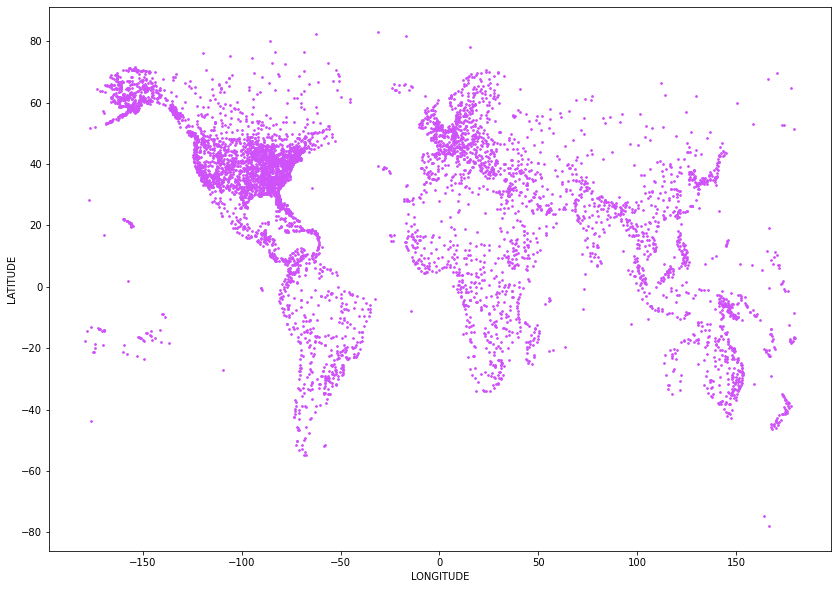

In [8]:
# Longitude corresponds to the x-axis and Latitude to the y-axis.
airports.plot(x='LONGITUDE', y='LATITUDE', kind='scatter', color=colors[1], s=3)
fig = plt.gcf()
fig.set_size_inches(14, 10)

We can already recognize the shape of the continents. Using cartopy we can easily get a nice map of the world

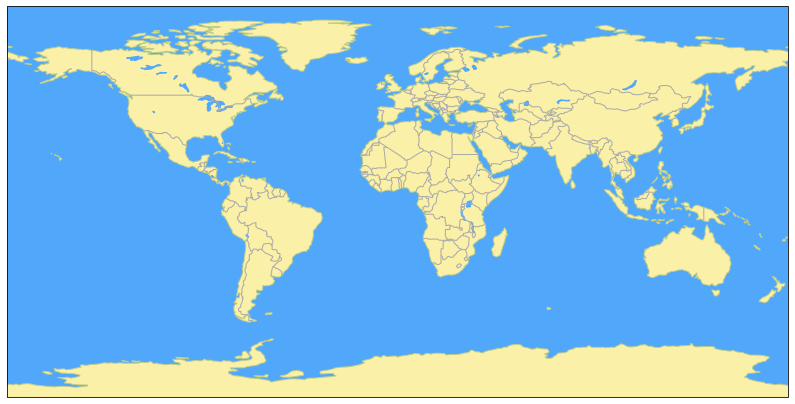

In [9]:
ax = plt.axes(projection=ccrs.PlateCarree())
fig = plt.gcf()

# Draw the oceans
ax.add_feature(cartopy.feature.OCEAN, color=colors[0])

# Draw the continents
ax.add_feature(cartopy.feature.LAND, color=colors[4], alpha=0.5)

# Draw major lakes
ax.add_feature(cartopy.feature.LAKES, color=colors[0])

# Draw country borders
ax.add_feature(cartopy.feature.BORDERS, edgecolor='darkgray', lw=1)

fig.set_size_inches(14, 10)

Which we can now use to overlay our points

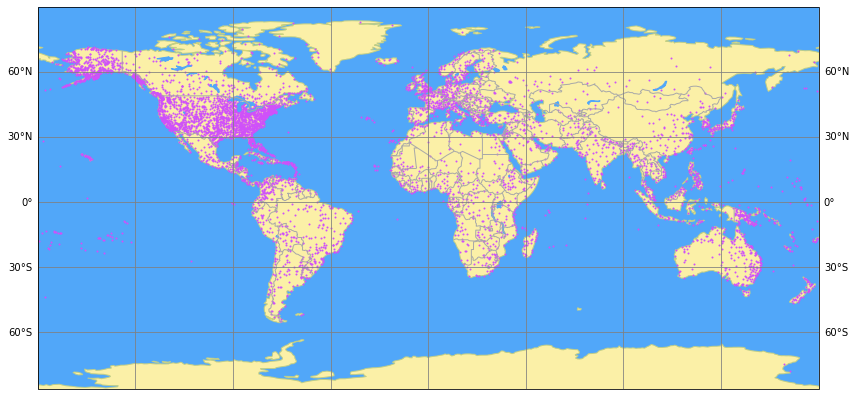

In [10]:
ax = plt.axes(projection=ccrs.PlateCarree())
fig = plt.gcf()

# Draw the oceans
ax.add_feature(cartopy.feature.OCEAN, color=colors[0])

# Draw the continents
ax.add_feature(cartopy.feature.LAND, color=colors[4], alpha=0.5)

# Draw major lakes
ax.add_feature(cartopy.feature.LAKES, color=colors[0])

# Draw country borders
ax.add_feature(cartopy.feature.BORDERS, edgecolor='darkgray', lw=1)

# Add longitude and latitude grid lines
ax.gridlines(draw_labels=True, dms=True, 
             xlocs=np.arange(-180, 180.1, 45), 
             ylocs=np.arange(-90, 90.1, 30),
             x_inline=False, y_inline=False, color='gray')

# Longitude corresponds to the x-axis and Latitude to the y-axis.
airports.plot(x='LONGITUDE', y='LATITUDE', kind='scatter', color=colors[1], 
              s=1, ax=ax) 

fig.set_size_inches(14, 10)

Another advantage of using using cartopy is that we can place them on a globe by just changing the projection argument to __plt.axes__

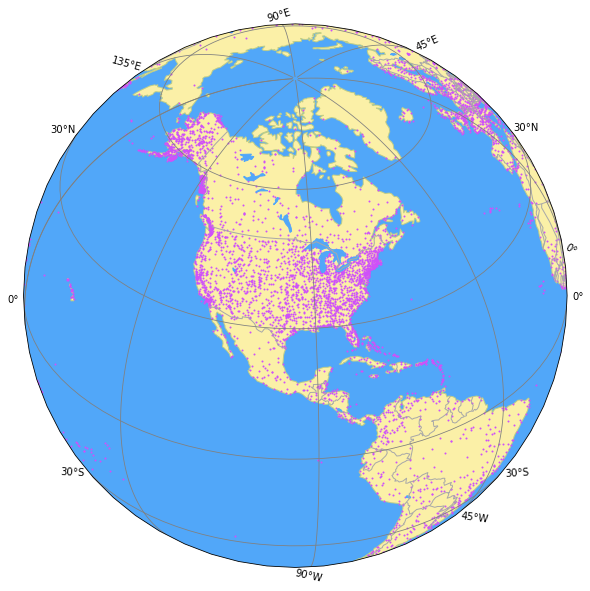

In [11]:
ax = plt.axes(projection=ccrs.Orthographic(-95, 37))
fig = plt.gcf()

# Draw the oceans
ax.add_feature(cartopy.feature.OCEAN, color=colors[0])

# Draw the continents
ax.add_feature(cartopy.feature.LAND, color=colors[4], alpha=0.5)

# Draw major lakes
ax.add_feature(cartopy.feature.LAKES, color=colors[0])

# Draw country borders
ax.add_feature(cartopy.feature.BORDERS, edgecolor='darkgray', lw=1)

# Add longitude and latitude grid lines
ax.gridlines(draw_labels=True, dms=True, 
             xlocs=np.arange(-180, 180.1, 45), 
             ylocs=np.arange(-90, 90.1, 30),
             x_inline=False, y_inline=False, color='gray')

# Longitude corresponds to the x-axis and Latitude to the y-axis.
airports.plot(x='LONGITUDE', y='LATITUDE', kind='scatter', color=colors[1], 
              s=1, ax=ax,
              # Tell cartopy what the original projection of the data is
              transform=ccrs.PlateCarree())


fig.set_size_inches(14, 10)

Now we download a nice background images from Nasa so that we can use it as a "texture" for our globe. Feel free to use another background. NASA makes a few dozen available [here](https://visibleearth.nasa.gov/collection/1484/blue-marble)

In [12]:
img = mpimg.imread('https://eoimages.gsfc.nasa.gov/images/imagerecords/147000/147190/eo_base_2020_clean_720x360.jpg', format='jpg')

Let's take a quick look

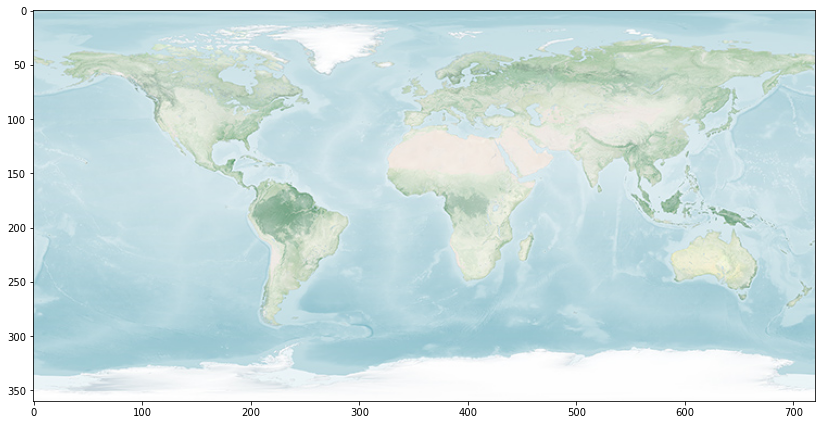

In [13]:
plt.imshow(img)
plt.gcf().set_size_inches(14, 10)

Not to shaby. Now we can add it to the surface of our globe using __imshow__ and cartopy to handle the projection

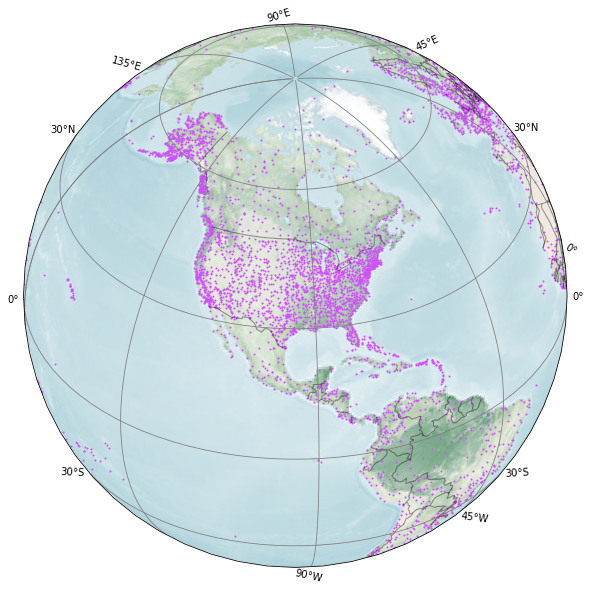

In [14]:
ax = plt.axes(projection=ccrs.Orthographic(-95, 37))
fig = plt.gcf()

# Add the blue marble figure as a "texture" on top of the globe
ax.imshow(img, origin="upper", extent=(-180, 180, -90, 90),
          # Tell cartopy what the original projection of the data is
          transform=ccrs.PlateCarree())  

# Draw country borders
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', lw=1, alpha=0.4)

# Add longitude and latitude grid lines
ax.gridlines(draw_labels=True, dms=True, 
             xlocs=np.arange(-180, 180.1, 45), 
             ylocs=np.arange(-90, 90.1, 30),
             x_inline=False, y_inline=False, color='gray')


# Longitude corresponds to the x-axis and Latitude to the y-axis.
airports.plot(x='LONGITUDE', y='LATITUDE', kind='scatter', color=colors[1], 
              s=1, ax=ax, 
              # Tell cartopy what the original projection of the data is
              transform=ccrs.PlateCarree())

fig.set_size_inches(14, 10)

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>